In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
funds = [{'fund_cd': '201609080B', 'fund_name': 'iFreeTOPIXインデックス', 'asset_class': '国内株式'}, 
        {'fund_cd': '201609080D', 'fund_name': 'iFree外国株式インデックス(H無)', 'asset_class': '先進国株式'},
        {'fund_cd': '201609080F', 'fund_name': 'iFree新興国株式インデックス', 'asset_class': '新興国株式'},
        {'fund_cd': '2016090810', 'fund_name': 'iFree日本債券インデックス', 'asset_class': '国内債権'},
        {'fund_cd': '2016090811', 'fund_name': 'iFree外国債券インデックス', 'asset_class': '先進国債券'},
        {'fund_cd': '2016090812', 'fund_name': 'iFree新興国債券インデックス', 'asset_class': '新興国債券'}, 
        {'fund_cd': '2016090813', 'fund_name': 'iFreeJ-REITインデックス', 'asset_class': '国内リート'},
        {'fund_cd': '2016090814', 'fund_name': 'iFree外国REITインデックス', 'asset_class': '先進国リート'}
       ]

In [3]:
fundsdata = pd.read_csv('csv/'+funds[0]['fund_cd']+'.csv')
fundsdata = fundsdata.drop('基準価額', axis=1)
for fund in funds:
    df = pd.read_csv('csv/'+fund['fund_cd']+'.csv')
    df = df.rename(columns={'基準価額': fund['asset_class']})
    fundsdata = pd.merge(fundsdata, df, on='日付')

In [21]:
# 等分散ポートフォリオリバランスなし
ganpon = 1000000
init_val = ganpon/8
portbase = fundsdata.drop('日付', axis=1)


In [33]:
# 数量、評価額、ポートフォリオ全体の評価額を計算
init_num = init_val*10000/portbase.loc[0]
nums_noreb = pd.DataFrame(np.ones((len(fundsdata.index),8)),columns=portbase.columns)*init_num
val_noreb = nums_noreb * portbase /10000
port_noreb = val_noreb.sum(axis=1)

In [34]:
# 比率を計算
alc_noreb = val_noreb.copy()
for index, row in alc_noreb.iterrows():
    alc_noreb.loc[index] = val_noreb.loc[index]/port_noreb.loc[index]

In [11]:
qdays=[20161003,	20170104,	20170403,	20170703,	20171002,	20180104,	20180402,	20180702,	20181001,	20190104,	20190401,	20190701,	20191001,	20200106,	20200401,	20200701,	20201001,	20210104,	20210401,	20210701,	20211001,	20220104,	20220401,	20220701,	20221003]

In [12]:
20210501 in qdays

False

In [13]:
nums_rebq = nums_noreb.copy()
vals_rebq = val_noreb.copy()

In [14]:
ganpon/fundsdata.loc[3,vals_rebq.columns]

国内株式      102.009589
先進国株式     101.450746
新興国株式     102.061645
国内債権      100.512614
先進国債券     101.010101
新興国債券     101.081573
国内リート     100.331093
先進国リート    102.616727
Name: 3, dtype: float64

In [15]:
vals_rebq.loc[3].sum()/8

123300.0

In [16]:
for index, row in vals_rebq.iterrows():
    if fundsdata.loc[index, '日付'] in qdays:
        vals_rebq.loc[index] = vals_rebq.loc[index-1].sum()/8
        nums_rebq.loc[index] = vals_rebq.loc[index]*10000/fundsdata.loc[index,vals_rebq.columns]
    elif index == 0:
        nums_rebq.loc[index] = nums_rebq.loc[index]
        vals_rebq.loc[index] = nums_rebq.loc[index] *fundsdata.loc[index,vals_rebq.columns]/10000
    else:
        nums_rebq.loc[index] = nums_rebq.loc[index-1]
        vals_rebq.loc[index] = nums_rebq.loc[index] *fundsdata.loc[index,vals_rebq.columns]/10000

In [17]:
port_rebq = vals_rebq.sum(axis=1)

In [45]:
# 比率を計算
alc_rebq = vals_rebq.copy()
for index, row in alc_rebq.iterrows():
    alc_rebq.loc[index] = vals_rebq.loc[index]/port_rebq.loc[index]

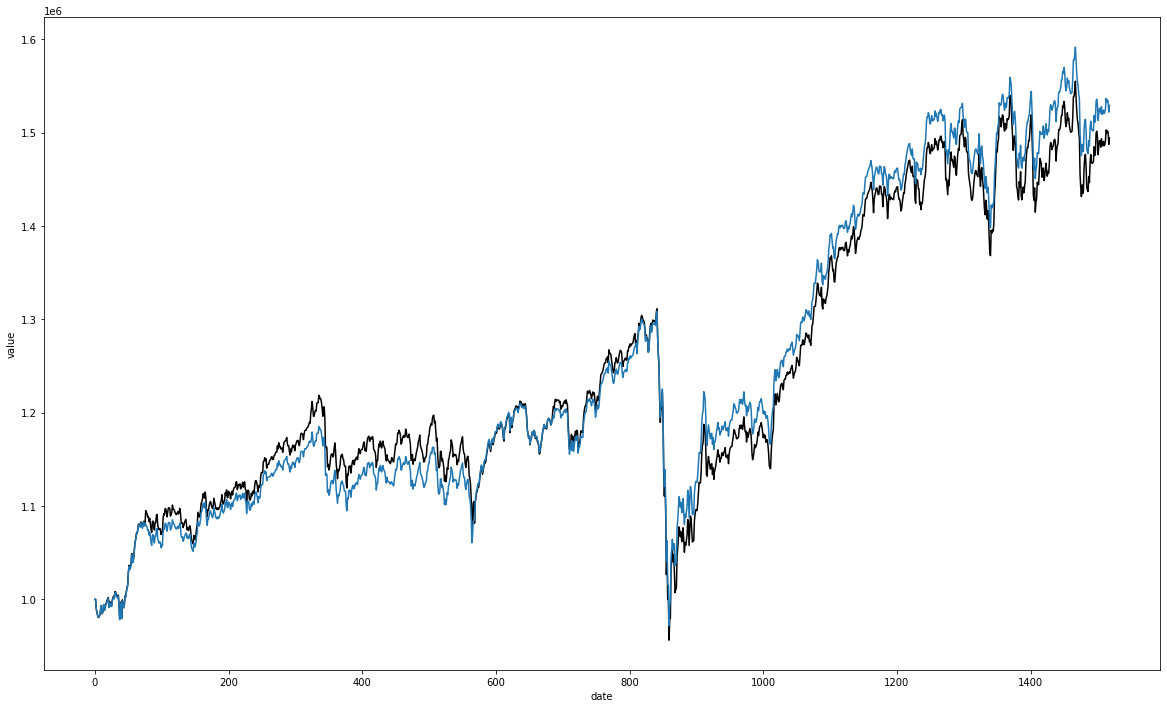

In [35]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, xlabel='date', ylabel='value')

ax.plot(port_noreb,c='k')
ax.plot(port_rebq)

# ax.legend(gs.columns.values[1:],loc='best')

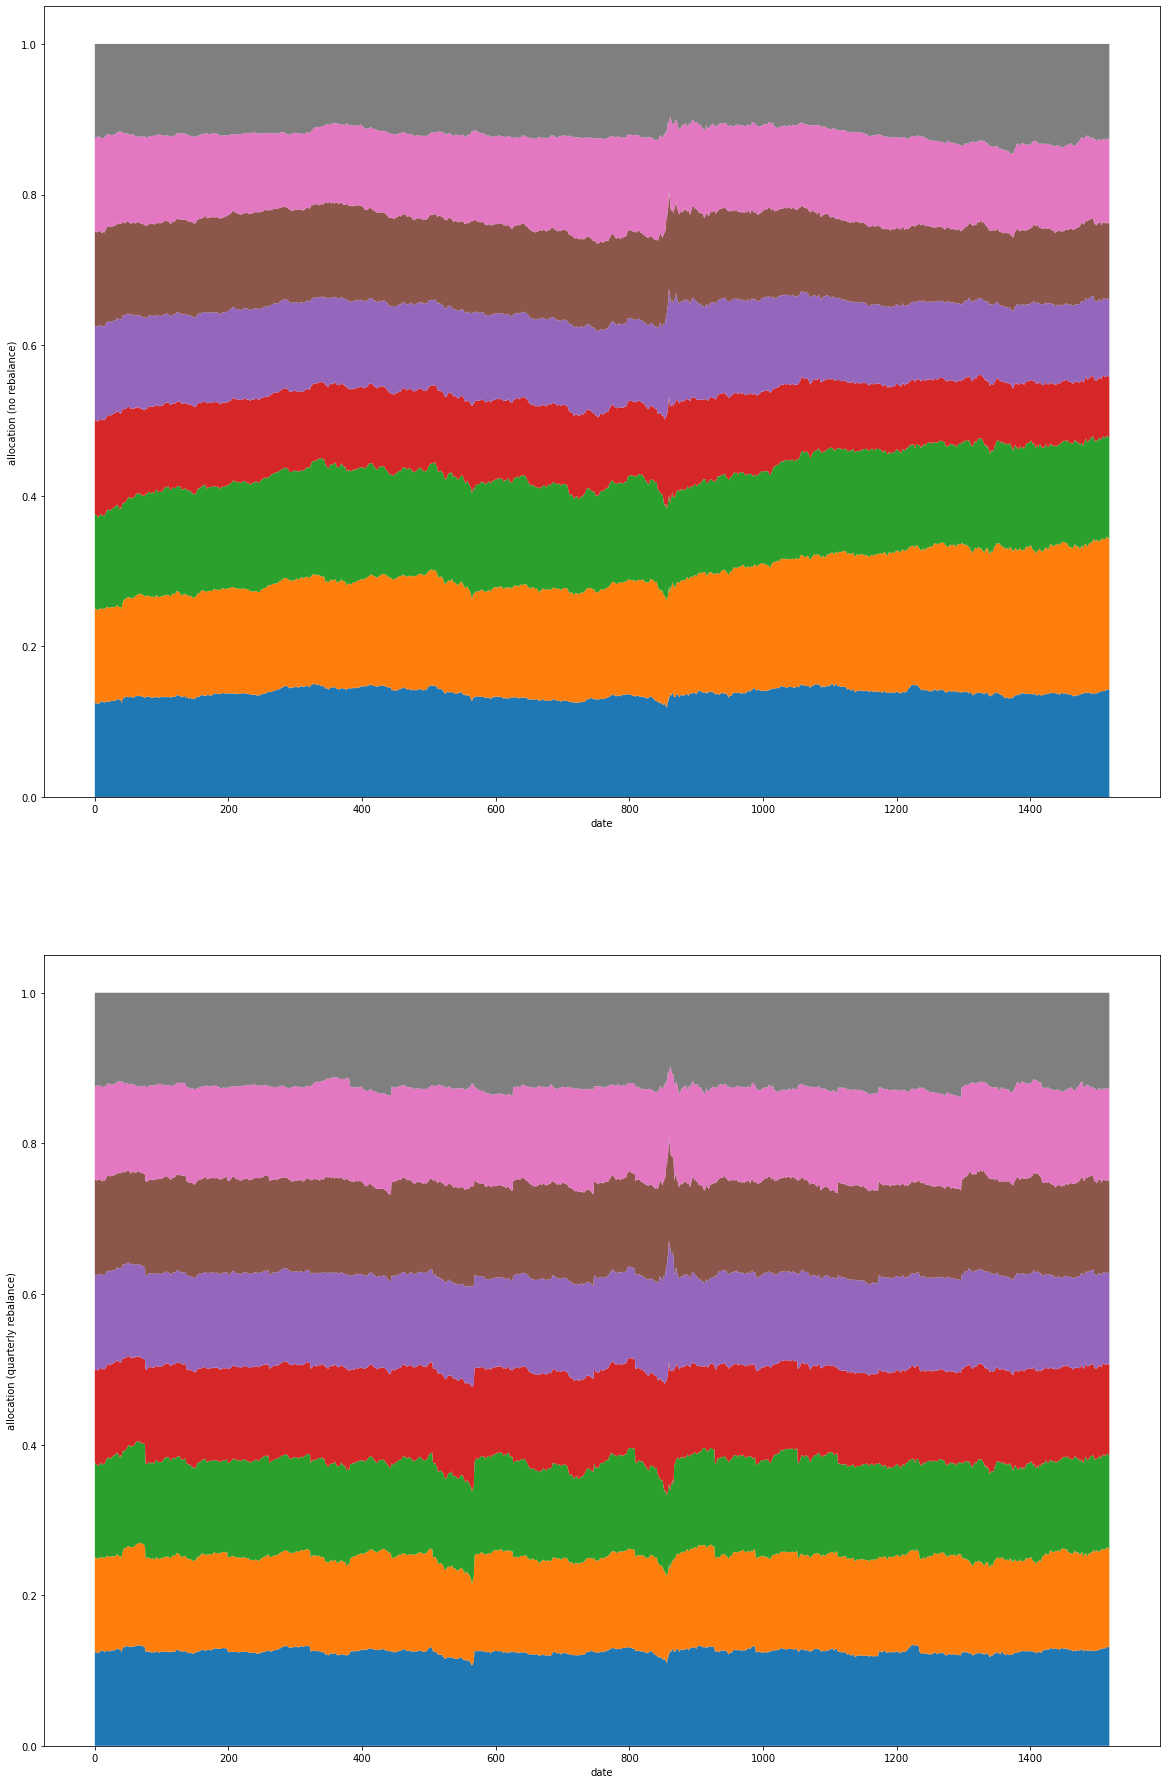

In [48]:
fig = plt.figure(figsize=(20, 32))
ax = fig.add_subplot(211, xlabel='date', ylabel='allocation (no rebalance)')
ax.stackplot(alc_noreb.index,alc_noreb.values.T)
# ax.legend(alc_noreb.columns)

ax = fig.add_subplot(212, xlabel='date', ylabel='allocation (quarterly rebalance)')
ax.stackplot(alc_rebq.index,alc_rebq.values.T)